In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 1. Generate a sample matrix (image-like data)
np.random.seed(42)
A = np.random.randint(0, 255, (5, 5))  # A 5x5 matrix
print("Original Matrix A:")
print(A)

Original Matrix A:
[[102 179  92  14 106]
 [ 71 188  20 102 121]
 [210 214  74 202  87]
 [116  99 103 151 130]
 [149  52   1  87 235]]


In [6]:
# 2. Step-by-step SVD Implementation

# Step 1: Compute A^T * A and A * A^T
ATA = np.dot(A.T, A)
AAT = np.dot(A, A.T)

# Step 2: Compute eigenvalues and eigenvectors
eigvals_ATA, eigvecs_ATA = np.linalg.eig(ATA)
eigvals_AAT, eigvecs_AAT = np.linalg.eig(AAT)

# Step 3: Sort eigenvalues and corresponding eigenvectors
sorted_indices_ATA = np.argsort(eigvals_ATA)[::-1]
eigvals_ATA = eigvals_ATA[sorted_indices_ATA]
eigvecs_ATA = eigvecs_ATA[:, sorted_indices_ATA]

sorted_indices_AAT = np.argsort(eigvals_AAT)[::-1]
eigvals_AAT = eigvals_AAT[sorted_indices_AAT]
eigvecs_AAT = eigvecs_AAT[:, sorted_indices_AAT]

# Step 4: Compute singular values
singular_values = np.sqrt(eigvals_ATA)
S = np.zeros_like(A, dtype=float)
np.fill_diagonal(S, singular_values[:min(A.shape)])

# Step 5: Compute U and V matrices
U = eigvecs_AAT
V_T = eigvecs_ATA.T

# Step 6: Reconstruct the original matrix
A_reconstructed = np.dot(U, np.dot(S, V_T))


In [7]:
print("\nU Matrix:")
print(U)


U Matrix:
[[-0.36575986 -0.21054808 -0.74625928 -0.4507606   0.24859848]
 [-0.39808745 -0.1354396  -0.33956637  0.66225601 -0.51893559]
 [-0.59700903 -0.42620975  0.47135408  0.15863516  0.46323394]
 [-0.42627905  0.06667577  0.32382474 -0.56544489 -0.62389913]
 [-0.41184037  0.86673249 -0.0274707   0.11549381  0.25508594]]


In [8]:
print("\nS Matrix:")
print(S)


S Matrix:
[[611.36033647   0.           0.           0.           0.        ]
 [  0.         178.51377423   0.           0.           0.        ]
 [  0.           0.         129.1164005    0.           0.        ]
 [  0.           0.           0.          82.81451499   0.        ]
 [  0.           0.           0.           0.          63.4435389 ]]


In [9]:
print("\nV_T Matrix:")
print(V_T)



V_T Matrix:
[[-0.49358157 -0.54254209 -0.21281869 -0.43594525 -0.47611475]
 [-0.09120511  0.57524214  0.25703563  0.09737688 -0.76500231]
 [ 0.24959829 -0.51053889 -0.05607732  0.74845417 -0.33722756]
 [-0.16937912  0.33559988 -0.9009433   0.21674402 -0.00257416]
 [ 0.81059871 -0.03830565 -0.27165675 -0.43966791 -0.27268508]]


In [10]:
print("\nReconstructed Matrix A:")
print(A_reconstructed)



Reconstructed Matrix A:
[[108.8560215  135.75820605  72.67825571   6.68003773 163.50634335]
 [ 75.41028409 160.18378096   7.57087016  97.29127598 157.9921989 ]
 [223.87855557 126.46619627  34.88724316 187.18229512 203.40934643]
 [113.82885459 112.69368848 109.1187551  153.31806486 111.78905453]
 [120.77681838 230.0071729   80.53900063 117.1330188   -1.7279585 ]]


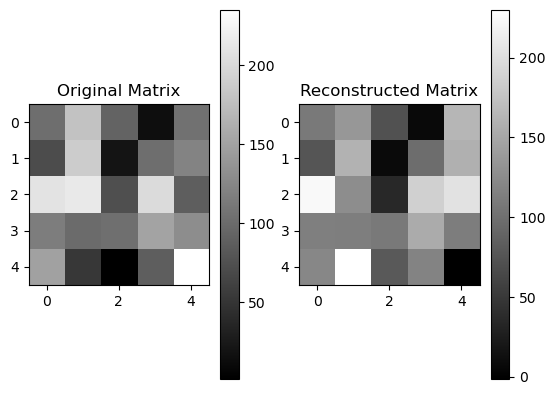

In [11]:
# 3. Visualize the original and reconstructed matrices
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.title("Original Matrix")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(A_reconstructed, cmap='gray')
plt.title("Reconstructed Matrix")
plt.colorbar()

plt.show()
